<a href="https://colab.research.google.com/github/romit-s/reunion/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("loan.csv")
df1.head()
df2 = pd.read_csv("applicant.csv")
df2.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [2]:
combined_df = pd.concat([df1.set_index('applicant_id'),df2.set_index('applicant_id')], axis=1, join='inner')
combined_df

,loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,...,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
applicant_id,,,,,,,,,,,,,,,,,,,,,
1469590,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,...,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1203873,d68d989e-edad-11ea-b1d5-2bcf65006448,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,...,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
1432761,d68d995c-edad-11ea-814a-1b6716782575,12,education,2096000,2,real estate,0,0,NaN,1,...,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
1207582,d68d99fc-edad-11ea-8841-17e8848060ae,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,...,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
1674436,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,new vehicle,4870000,3,NaN,0,0,NaN,2,...,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880194,d68fbba6-edad-11ea-80fe-30b2f9300e3d,12,FF&E,1736000,3,real estate,0,0,NaN,1,...,own,4,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
1114064,d68fbc28-edad-11ea-bc62-4240ac0824fa,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,1,...,own,4,management / self-employed / highly qualified ...,1 year,4 years,Registered under the applicant's name,1,Low,NaN,0
1758046,d68fbcaa-edad-11ea-aafc-2de1139e42cd,12,electronic equipment,804000,4,car or other,0,0,NaN,1,...,own,4,skilled employee / official,7 years,NaN,NaN,1,Low,NaN,NaN


## Checking Missing Values

In [3]:
combined_df.isnull().sum()

loan_application_id                                           0
Months_loan_taken_for                                         0
Purpose                                                      12
Principal_loan_amount                                         0
EMI_rate_in_percentage_of_disposable_income                   0
Property                                                    154
Has_coapplicant                                               0
Has_guarantor                                                 0
Other_EMI_plans                                             814
Number_of_existing_loans_at_this_bank                         0
Loan_history                                                  0
high_risk_applicant                                           0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                    

## Data Visualization

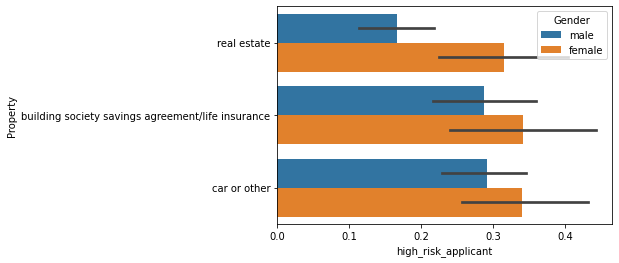

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
  
  
sns.barplot(x='high_risk_applicant',y = 'Property',hue= 'Gender', data=combined_df, )
plt.show()

Males with real estate are least likely to default

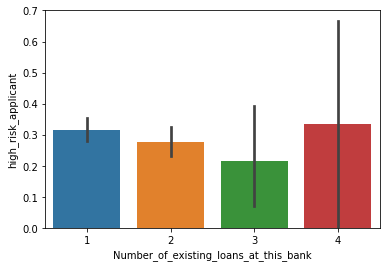

In [5]:
sns.barplot(x='Number_of_existing_loans_at_this_bank',y = 'high_risk_applicant', data=combined_df, )

People with 4 existing banks are high risk applicants.

(array([136., 231., 633.]), array([1, 2, 3, 4]), <a list of 3 Patch objects>)

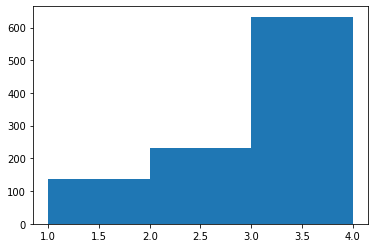

In [6]:
data= combined_df['EMI_rate_in_percentage_of_disposable_income']
plt.hist(data, bins=np.arange(data.min(), data.max()+1))

Frequency distribution of 'EMI_rate_in_percentage_of_disposable_income'

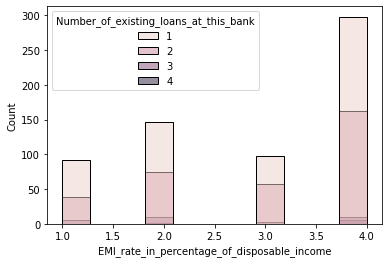

In [7]:
sns.histplot(data=combined_df, x="EMI_rate_in_percentage_of_disposable_income",hue = 'Number_of_existing_loans_at_this_bank',kde = False)
plt.show()

People with existing loans equal to 4 and EMI_rate equal to 4 are most likely to default

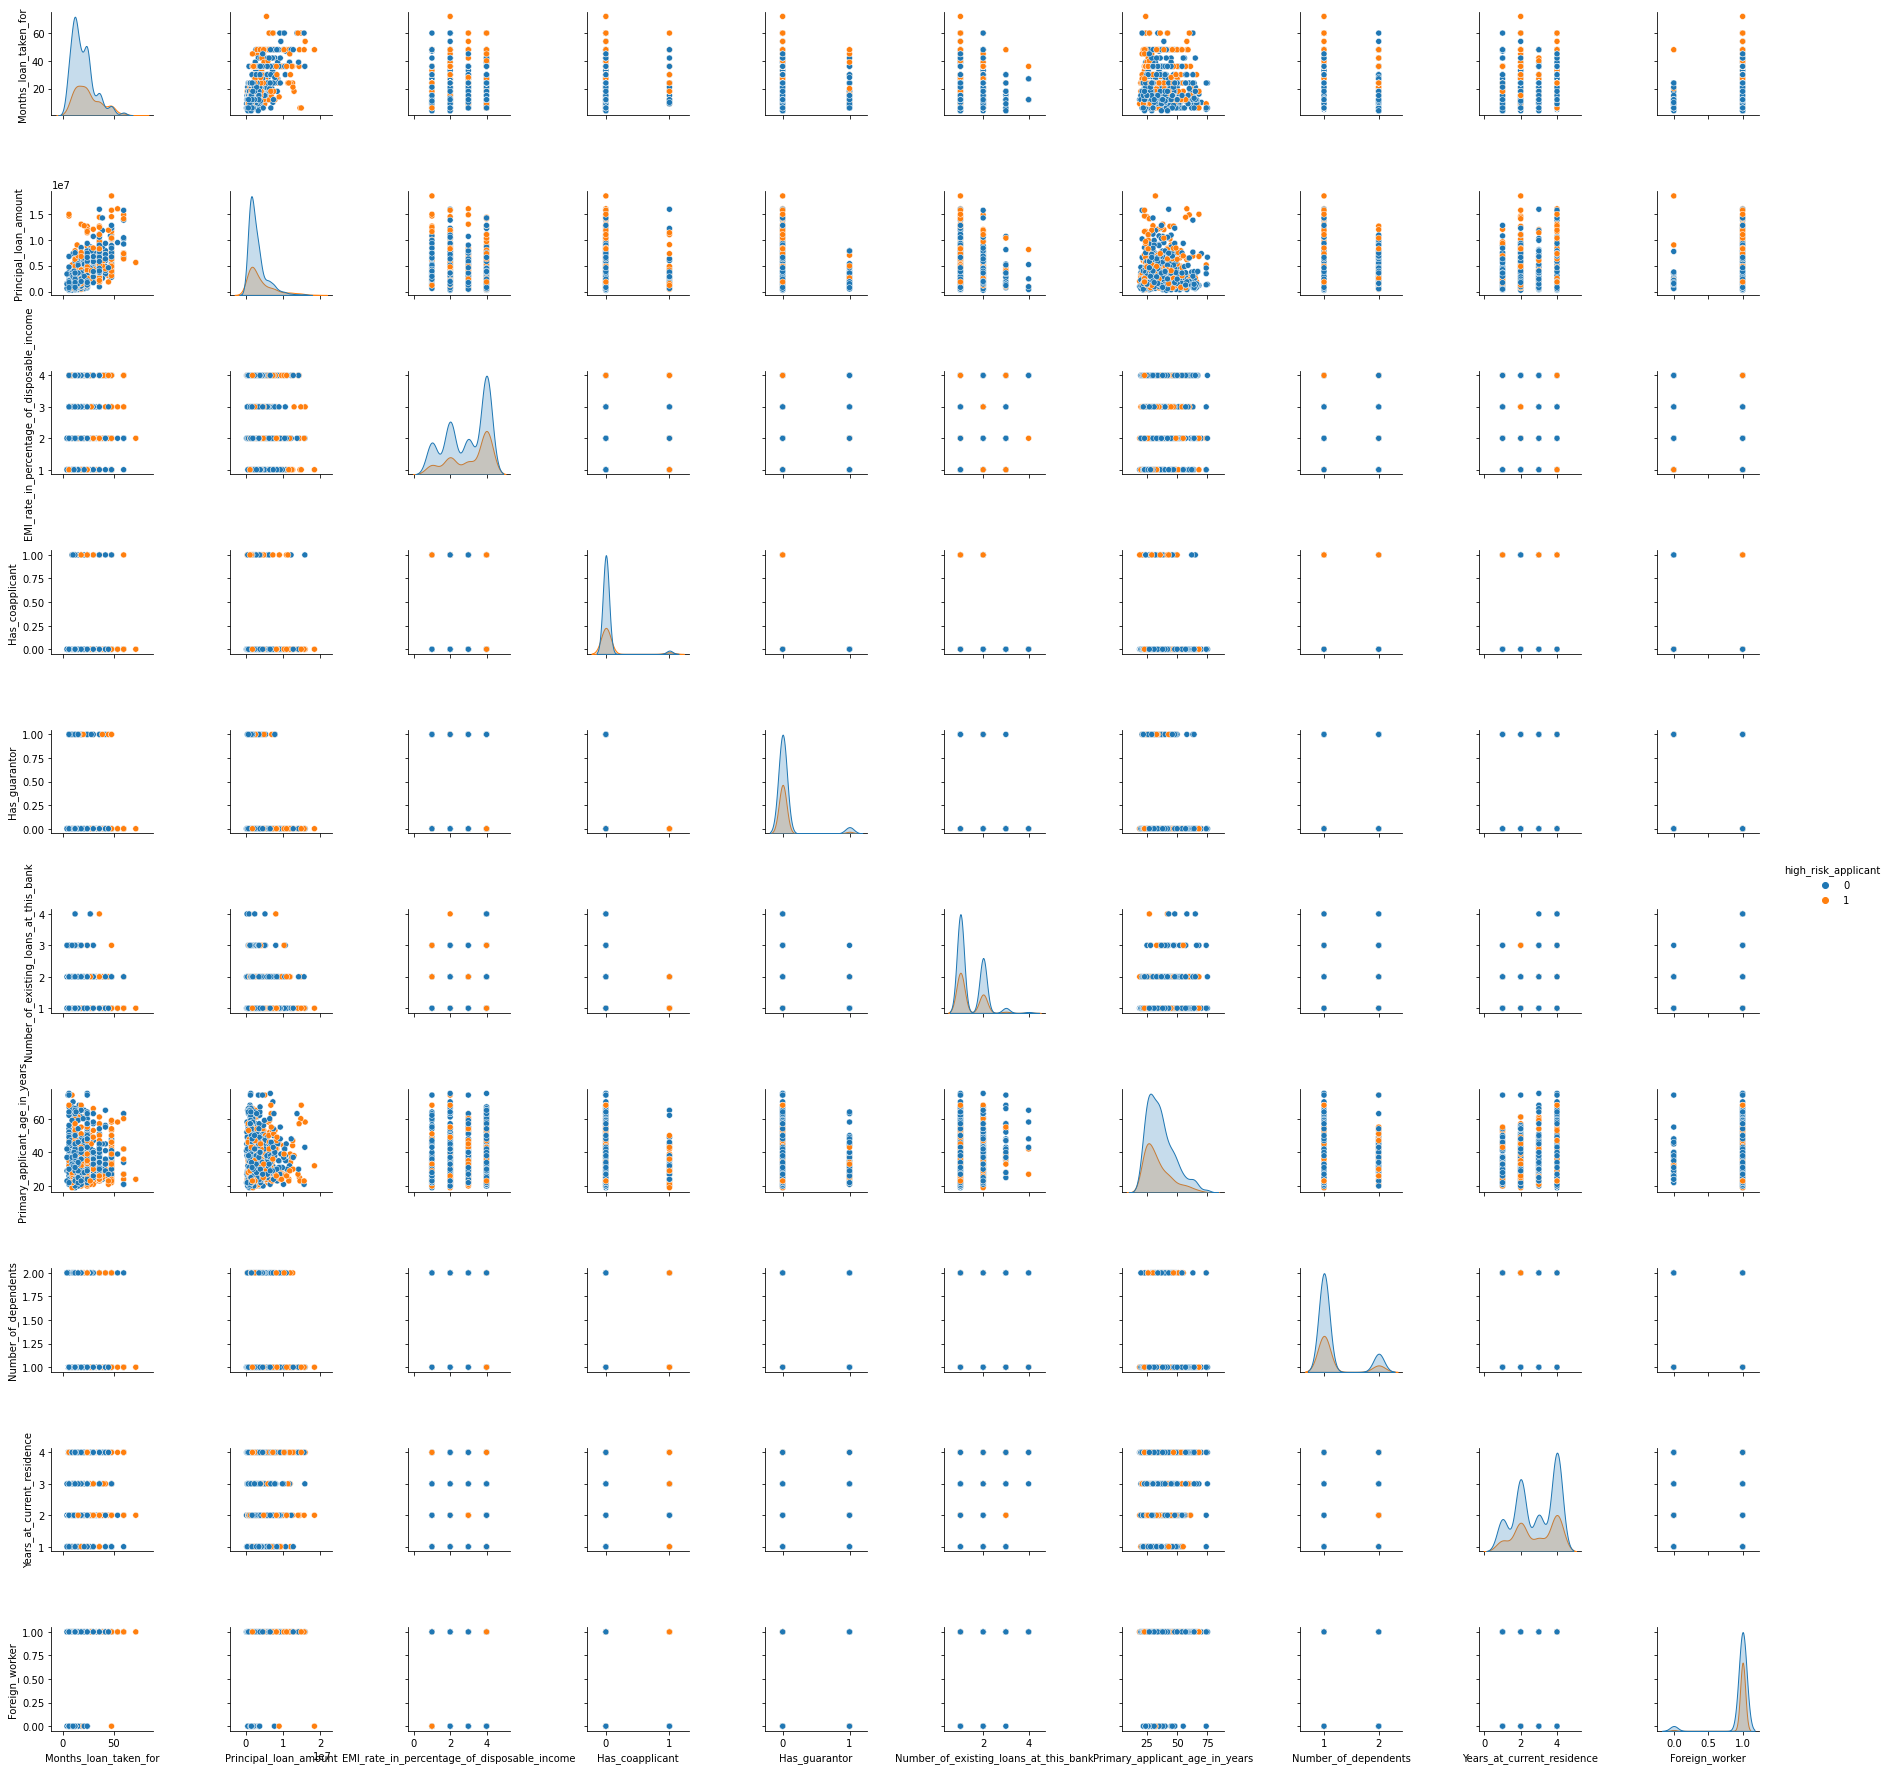

In [9]:
sns.pairplot(combined_df,kind = "scatter",hue = "high_risk_applicant")
plt.show()

High risk applicant distribution

1. As soon in the graph if the number of months loan is taken for is less they are more likely low risk applicants
2. If person has coapplicant they are more likely to default
3. Younger people are more likely to default

## Correlation Matrix

                                             Months_loan_taken_for  \
Months_loan_taken_for                                     1.000000   
Principal_loan_amount                                     0.624984   
EMI_rate_in_percentage_of_disposable_income               0.074749   
Has_coapplicant                                           0.029698   
Has_guarantor                                            -0.039594   
Number_of_existing_loans_at_this_bank                    -0.011284   
high_risk_applicant                                       0.214927   
Primary_applicant_age_in_years                           -0.036136   
Number_of_dependents                                     -0.023834   
Years_at_current_residence                                0.034067   
Foreign_worker                                            0.138196   

                                             Principal_loan_amount  \
Months_loan_taken_for                                     0.624984   
Principal_loan_amou

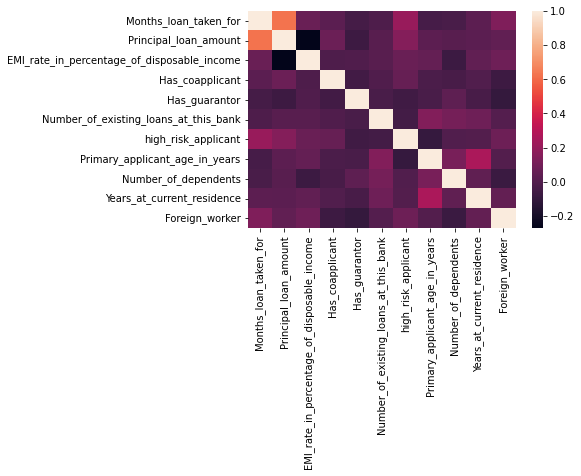

In [12]:
corr = combined_df.corr()

sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
plt.show()

## Calculating Skew of individual columns

In [10]:
from scipy.stats import skew
for (columnName, columnData) in combined_df.iteritems():
    try:
      print(columnName+" : "+str(combined_df[columnName].skew(axis=0,skipna=True)))
    except:
      pass
# print(skew(dft, axis=0, bias=True))

Months_loan_taken_for : 1.0941841715555418
Principal_loan_amount : 1.9496276798326202
EMI_rate_in_percentage_of_disposable_income : -0.5313481143125486
Has_coapplicant : 4.636536169813055
Has_guarantor : 4.041609707476346
Number_of_existing_loans_at_this_bank : 1.2725759670020926
high_risk_applicant : 0.874183382765495
Primary_applicant_age_in_years : 1.0207392686768317
Number_of_dependents : 1.909444721297485
Years_at_current_residence : -0.2725698140337228
Foreign_worker : -4.913027374046549
